In [1]:
import pandas as pd
import numpy as np

path = "C:/Users/Admin/Downloads/Sleep_health_and_lifestyle_dataset.csv"

df = pd.read_csv(path)

df.head()

,ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6,6,60,8,Normal,125/81,75,10000,NaN
3,4,Male,28,Sales Representative,6,4,30,8,Obese,125/82,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,6,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Data Types
df.dtypes

ID                          int64
Gender                     object
Age                         int64
Occupation                 object
Sleep Duration              int64
Quality of Sleep            int64
Physical Activity Level     int64
Stress Level                int64
BMI Category               object
Blood Pressure             object
Heart Rate                  int64
Daily Steps                 int64
Sleep Disorder             object
dtype: object

In [4]:
# Number of rows and columns
df.shape

(374, 13)

In [5]:
# Statistical Summary
df.describe()

,ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.165775,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.850362,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,6.000000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.000000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.000000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,8.000000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,9.000000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
# Check for missing values for Sleep Disorder column
df['Sleep Disorder'].isnull().sum()

np.int64(219)

In [7]:
# Most frequent Sleep Disorder
df['Sleep Disorder'].mode()

0    Sleep Apnea
Name: Sleep Disorder, dtype: object

In [8]:
# Replace NaN values with "None"
df['Sleep Disorder'] = df['Sleep Disorder'].fillna("None")

In [10]:
# Display first few rows
df.head()

,ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6,6,60,8,Normal,125/81,75,10000,None
3,4,Male,28,Sales Representative,6,4,30,8,Obese,125/82,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,6,4,30,8,Obese,140/90,85,3000,Sleep Apnea


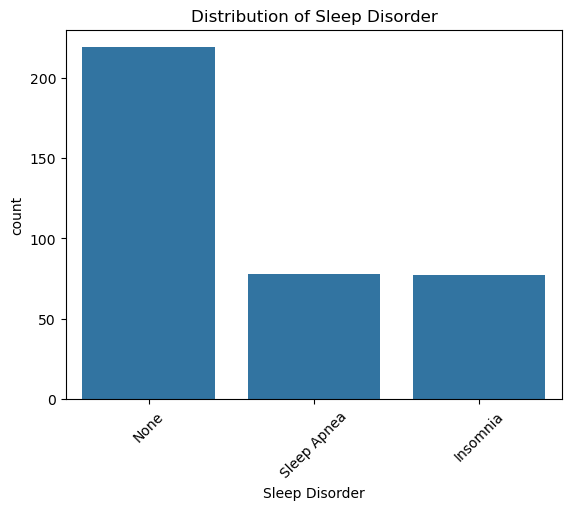

In [13]:
# Sleep Disorder
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Sleep Disorder', order=df['Sleep Disorder'].value_counts().index)
plt.title("Distribution of Sleep Disorder")
plt.xticks(rotation=45)
plt.show()

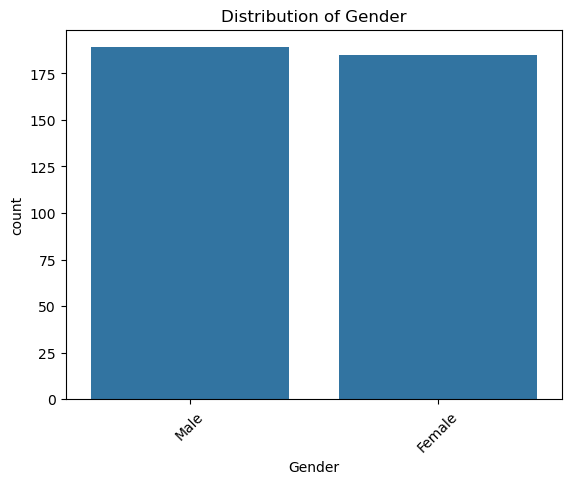

In [21]:
# Gender Distribution
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index)
plt.title("Distribution of Gender")
plt.xticks(rotation=45)
plt.show()

In [ ]:
## The dataset has approximately equal number of male and female

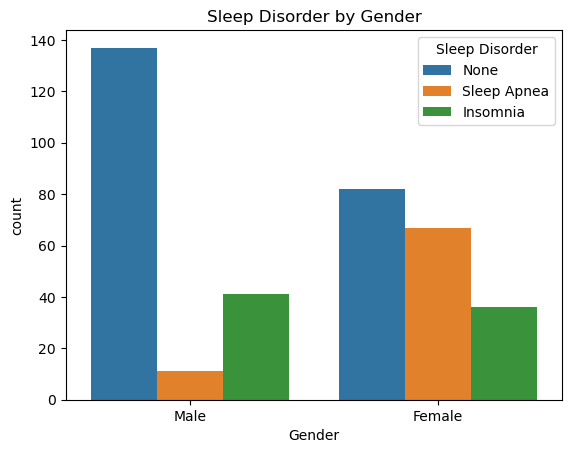

In [15]:
# Sleep Disorder vs Gender
sns.countplot(data=df, x='Gender', hue='Sleep Disorder')
plt.title("Sleep Disorder by Gender")
plt.show()

In [ ]:
## The visualisation above shows that women tend to have more sleep disorders than men. 

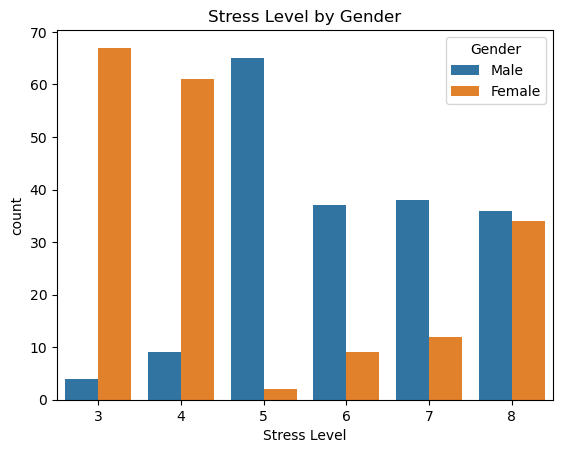

In [17]:
# Stress level by Gender
sns.countplot(data=df, x='Stress Level', hue='Gender')
plt.title("Stress Level by Gender")
plt.show()

In [ ]:
## Men have higher stress levels than women. 

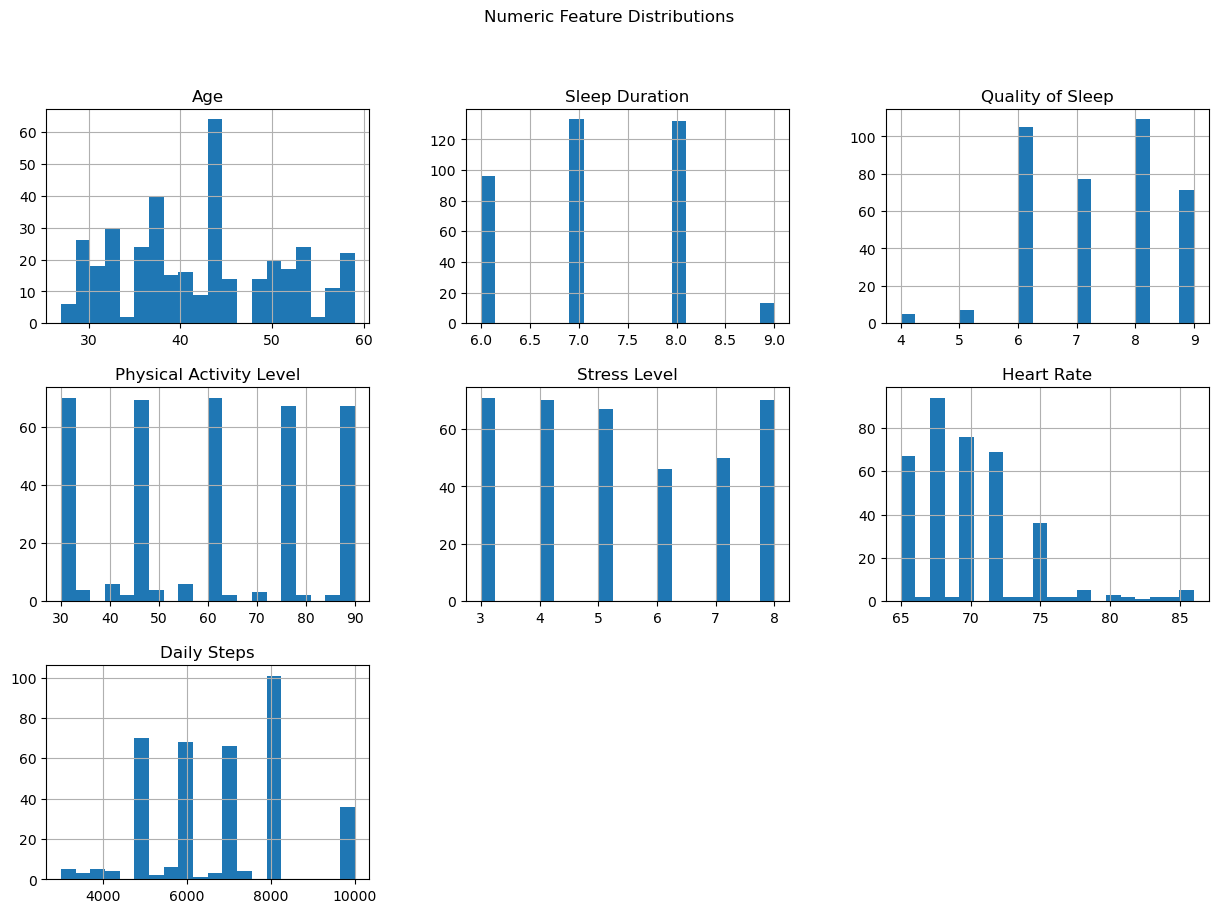

In [22]:
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps']

df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Numeric Feature Distributions")
plt.show()

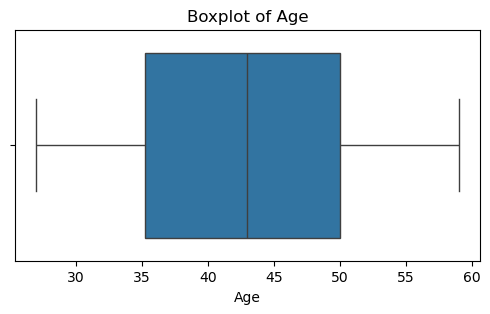

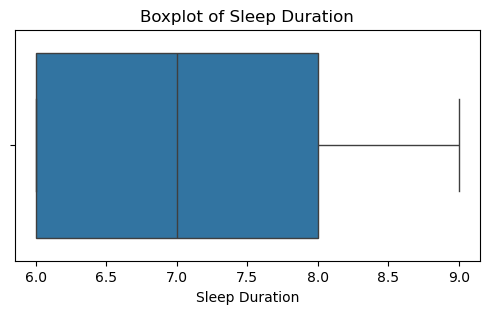

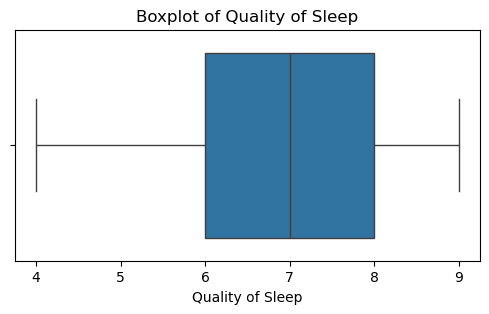

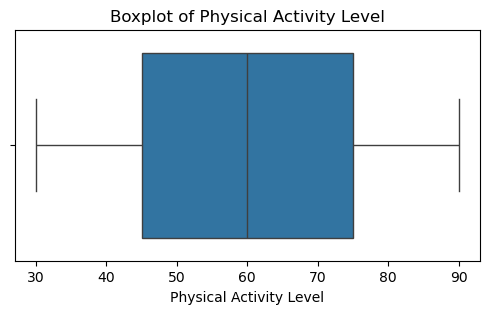

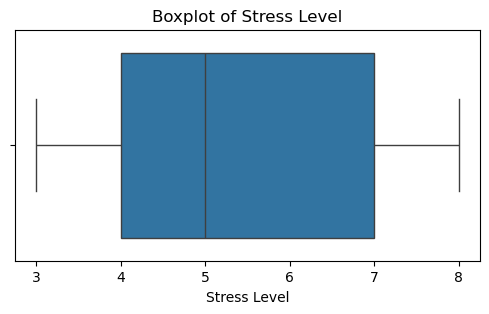

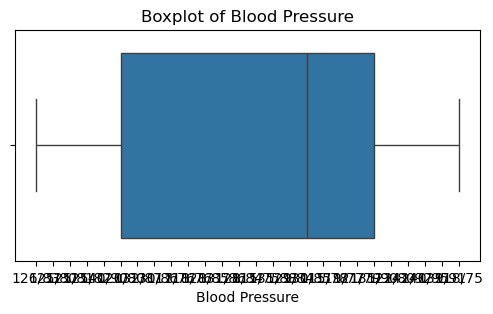

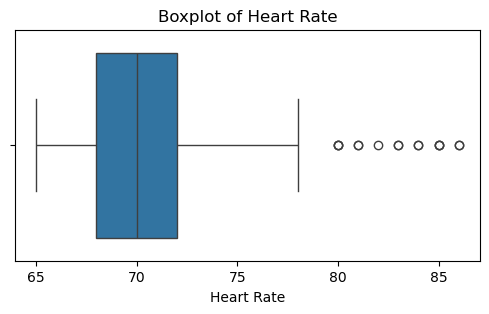

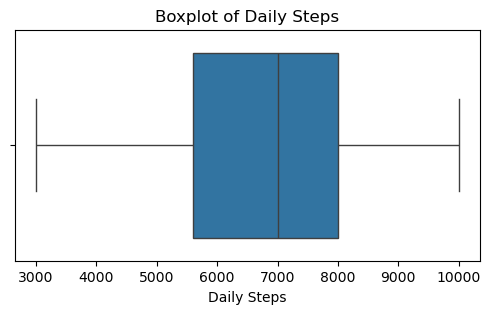

In [23]:
# Outliers and spread
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [25]:
# Split Blood Pressure Column into Systolic & Diastolic Columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert to numeric
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'], errors='coerce')
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'], errors='coerce')

In [26]:
df.head()

,ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6,6,60,8,Normal,125/81,75,10000,None,125,81
3,4,Male,28,Sales Representative,6,4,30,8,Obese,125/82,85,3000,Sleep Apnea,125,82
4,5,Male,28,Sales Representative,6,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


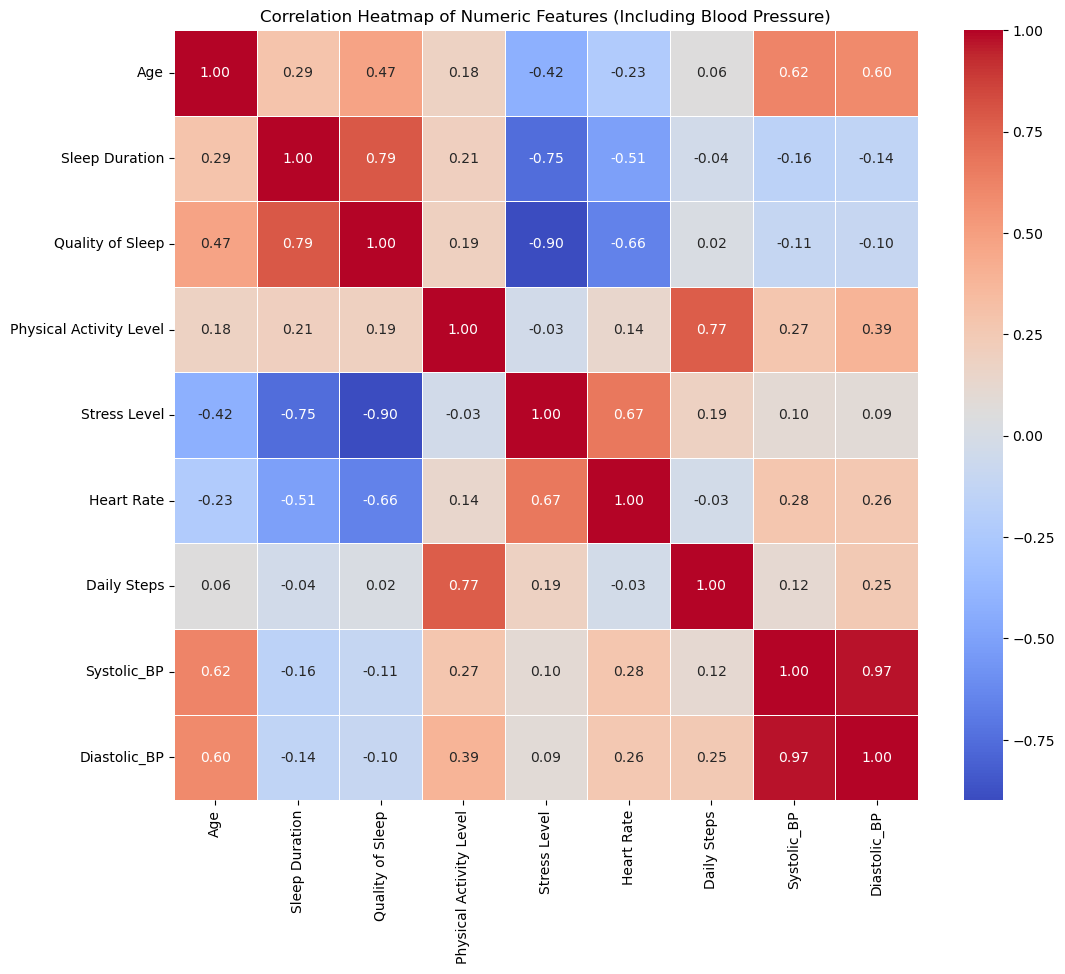

In [27]:
# Update numeric columns list
numeric_cols = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP'
]

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features (Including Blood Pressure)")
plt.show()

In [63]:
!pip install --upgrade scikit-learn

In [34]:
# Create Sleep Health Score (Sleep duration*Quality of sleep) and Standardise it
from sklearn.preprocessing import MinMaxScaler
df_numeric = df[['Sleep Duration', 'Quality of Sleep']].copy()

# Scale to 0–1 range
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Combine into a single sleep health score (1-100
df['Sleep_Health_Score'] = (0.6 * df_scaled['Quality of Sleep'] + 
                            0.4 * df_scaled['Sleep Duration']) * 100

# Quick check
print(df[['Sleep Duration','Quality of Sleep','Sleep_Health_Score']].head())

   Sleep Duration  Quality of Sleep  Sleep_Health_Score
0               6                 6                24.0
1               6                 6                24.0
2               6                 6                24.0
3               6                 4                 0.0
4               6                 4                 0.0


In [36]:
# Features 
X = df[['Physical Activity Level', 'Daily Steps', 'Stress Level', 
        'Age', 'Systolic_BP', 'Diastolic_BP', 'Heart Rate']]

# Target
y = df['Sleep_Health_Score']

# Split and train regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Done!")

Done!


In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
lr = LinearRegression()

In [45]:
lr.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
Y_hat = lr.predict(X)
Y_hat[0:5]

array([33.00091294, 24.68799238, 22.43181722,  7.25177685,  3.31683172])

In [53]:
a = lr.intercept_
a

np.float64(177.3308983699561)

In [50]:
lr.coef_

array([ 4.02901267e-01, -7.82731336e-04, -9.34381146e+00,  5.71570254e-01,
        9.40963744e-01, -2.25617516e+00, -6.31594656e-01])

In [56]:
# Predicting the Sleep Health Scores 

# Y_hat = a + b1X1 + b2X2 + b3X3 + ... + bnXn
# Where a = intercept, b = coefficients, X = Predictive Features, Y_hat = response variable (Sleep Health Score)

Sleep_Health_Score = 177.33 + 4.02901267e-01*df['Physical Activity Level'] + -7.82731336e-04*df['Daily Steps'] + -9.34381146e+00*df['Stress Level'] + 5.71570254e-01*df['Age'] + 9.40963744e-01*df['Systolic_BP'] + -2.25617516e+00*df['Diastolic_BP'] + -6.31594656e-01*df['Heart Rate']
Sleep_Health_Score

0      33.000015
1      24.687094
2      22.430919
3       7.250879
4       3.315933
         ...    
369    82.209534
370    82.209534
371    82.209534
372    82.209534
373    82.209534
Length: 374, dtype: float64

<Axes: xlabel='Physical Activity Level', ylabel='Sleep_Health_Score'>

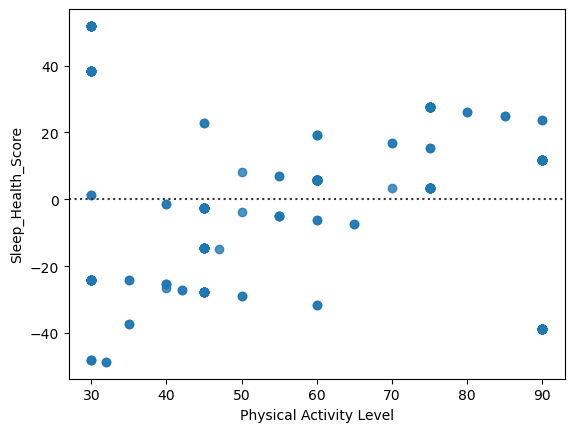

In [57]:
sns.residplot(x=df['Physical Activity Level'], y=df['Sleep_Health_Score'])

In [59]:
R2_score = lr.score(X,y)
R2_score

0.8574522536018923

In [60]:
mse = mean_squared_error(y, Y_hat)
mse

84.02591347399948

In [70]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.2f} | RMSE: {rmse_lr:.2f} | R²: {r2_lr:.2f}\n")

# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("Linear Regression Coefficients:")
print(coef_df)

# --------------------------
# Polynomial Regression (degree 2)
# --------------------------
poly_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    LinearRegression()
)

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Evaluate Polynomial Regression
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_lr)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression Performance:")
print(f"MAE: {mae_poly:.2f} | RMSE: {rmse_poly:.2f} | R²: {r2_poly:.2f}")

Linear Regression Performance:
MAE: 7.25 | RMSE: 73.84 | R²: 0.88

Linear Regression Coefficients:
                   Feature  Coefficient
2             Stress Level   -16.770455
5             Diastolic_BP   -13.807684
0  Physical Activity Level     8.302155
4              Systolic_BP     7.152626
3                      Age     4.842077
6               Heart Rate    -1.989621
1              Daily Steps    -1.351610

Polynomial Regression Performance:
MAE: 3.00 | RMSE: 73.84 | R²: 0.95


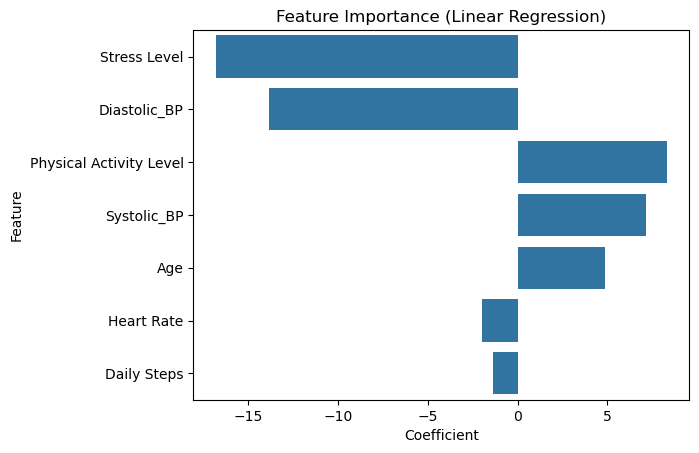

In [71]:
# Visualise predictors of sleep health
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title("Feature Importance (Linear Regression)")
plt.show()

In [74]:
# Prediction:
# High stress level and high diastolic BP decreases sleep health
# Physical activity and systolic BP increases sleep health
# Age has a strong correlation with health performance as well

In [77]:
# Export the cleaned dataframe to a CSV file
df.to_csv("sleep_analysis_dataset.csv", index=False)
print("Done")

Done
